In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
!wget "https://github.com/ausungju/human_learning/raw/main/trash_new.npy" -O trash.npy
!wget "https://github.com/ausungju/human_learning/raw/main/target_new.npy" -O target.npy
trash = np.load('trash.npy')
target = np.load('target.npy')

trash = trash.reshape(-1,50,50,3) / 255.0
print(trash.shape)
print(target.shape)
print(trash[0][0][0])

--2023-06-06 02:37:15--  https://github.com/ausungju/human_learning/raw/main/trash_new.npy
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy [following]
--2023-06-06 02:37:15--  https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139200128 (133M) [application/octet-stream]
Saving to: ‘trash.npy’

trash.npy           100%[===================>] 132.75M   455MB/s    in 0.3s    

2023-06-06 02:37:23 (455 MB/s) - ‘trash.npy’ saved [139200128/139200128]

--2023-

In [4]:
train_input, test_input, train_target, test_target = train_test_split(trash, target, test_size = 0.2, random_state = 42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

print(train_input.shape)
print(test_input.shape)
print(val_input.shape)
print(test_target.shape)
print(train_target.shape)
print(val_target.shape)

(11878, 50, 50, 3)
(3712, 50, 50, 3)
(2970, 50, 50, 3)
(3712,)
(11878,)
(2970,)


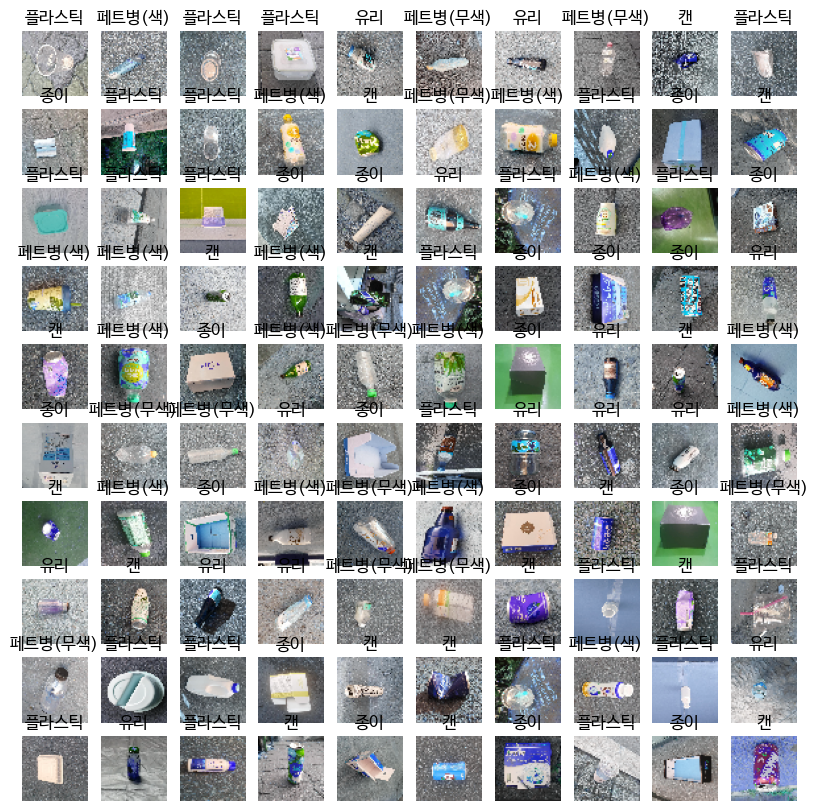

In [5]:
Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.figure(figsize=(10, 10))
plt.rc('font', family='NanumBarunGothic')
for images in range(100):
  ax = plt.subplot(10, 10, images + 1)
  plt.imshow(train_input[images], cmap = 'gray_r')
  plt.title(Class[train_target[images]])
  plt.axis("off")
plt.show()

In [16]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (50,50,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, kernel_size = 3, activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [17]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs = 30, verbose = 1,
                    validation_data = (val_input, val_target), 
                    callbacks = [checkpoint_cb,early_stopping_cb])

print("train : ",model.evaluate(train_input,train_target, verbose = 0))
print("test : ",model.evaluate(test_input,test_target, verbose = 0))
print("val : ",model.evaluate(val_input,val_target, verbose = 0))
print("--------------------------------------")

Epoch 1/30
372/372 [==============================] - 8s 15ms/step - loss: 1.5664 - accuracy: 0.3434 - val_loss: 1.4188 - val_accuracy: 0.4222
Epoch 2/30
372/372 [==============================] - 5s 13ms/step - loss: 1.3537 - accuracy: 0.4548 - val_loss: 1.3123 - val_accuracy: 0.4754
Epoch 3/30
372/372 [==============================] - 4s 10ms/step - loss: 1.2478 - accuracy: 0.4973 - val_loss: 1.2200 - val_accuracy: 0.5182
Epoch 4/30
372/372 [==============================] - 3s 9ms/step - loss: 1.1552 - accuracy: 0.5451 - val_loss: 1.1219 - val_accuracy: 0.5599
Epoch 5/30
372/372 [==============================] - 3s 9ms/step - loss: 1.0602 - accuracy: 0.5908 - val_loss: 1.0313 - val_accuracy: 0.5990
Epoch 6/30
372/372 [==============================] - 4s 10ms/step - loss: 0.9568 - accuracy: 0.6341 - val_loss: 0.9600 - val_accuracy: 0.6310
Epoch 7/30
372/372 [==============================] - 3s 9ms/step - loss: 0.8729 - accuracy: 0.6712 - val_loss: 0.8722 - val_accuracy: 0.6801
Ep

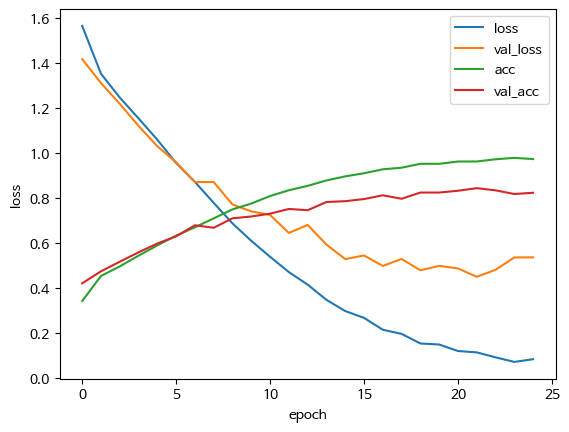

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','acc','val_acc'])
plt.show()

1/1 [==============================] - 0s 258ms/step
[[1.1336718e-02 5.3887877e-08 8.8046095e-04 8.6846900e-01 2.3387335e-04
  1.1907997e-01]]


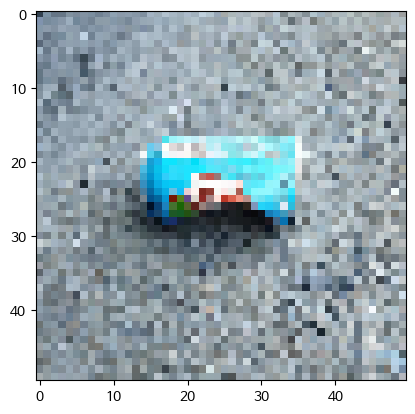

맞춘 값 ;  캔
정답 :  캔


In [9]:
j = 7
preds = model.predict(test_input[j:j+1])
print(preds)
Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.imshow(test_input[j],cmap = 'gray_r')
plt.show()
print("맞춘 값 ; ",Class[np.argmax(preds)])
print("정답 : ",Class[test_target[j]])

116/116 [==============================] - 0s 3ms/step
[3, 4, 12, 19, 39, 44, 51, 56, 63, 76, 77, 81, 82, 84, 86, 91, 93, 96, 104, 105, 108, 109, 111, 120, 126, 127, 129, 136, 139, 140, 151, 154, 159, 164, 168, 170, 175, 180, 185, 191, 192, 193, 200, 203, 219, 223, 233, 234, 252, 253, 257, 258, 271, 276, 280, 282, 286, 287, 292, 294, 296, 308, 315, 324, 330, 338, 348, 357, 358, 364, 367, 369, 389, 397, 398, 406, 407, 408, 410, 420, 430, 444, 445, 457, 462, 465, 468, 471, 473, 477, 481, 484, 495, 496, 498, 500, 505, 507, 510, 516, 517, 520, 526, 527, 530, 533, 538, 539, 544, 553, 563, 569, 580, 591, 592, 597, 605, 608, 625, 630, 635, 640, 641, 653, 657, 659, 660, 666, 670, 676, 679, 684, 686, 695, 699, 720, 741, 746, 778, 783, 785, 828, 844, 850, 852, 853, 862, 866, 873, 874, 879, 884, 890, 893, 894, 897, 901, 903, 917, 921, 926, 928, 945, 948, 951, 953, 960, 962, 970, 974, 976, 981, 986, 988, 993, 997, 1002, 1010, 1016, 1025, 1028, 1033, 1038, 1046, 1047, 1058, 1064, 1065, 1069, 1071, 

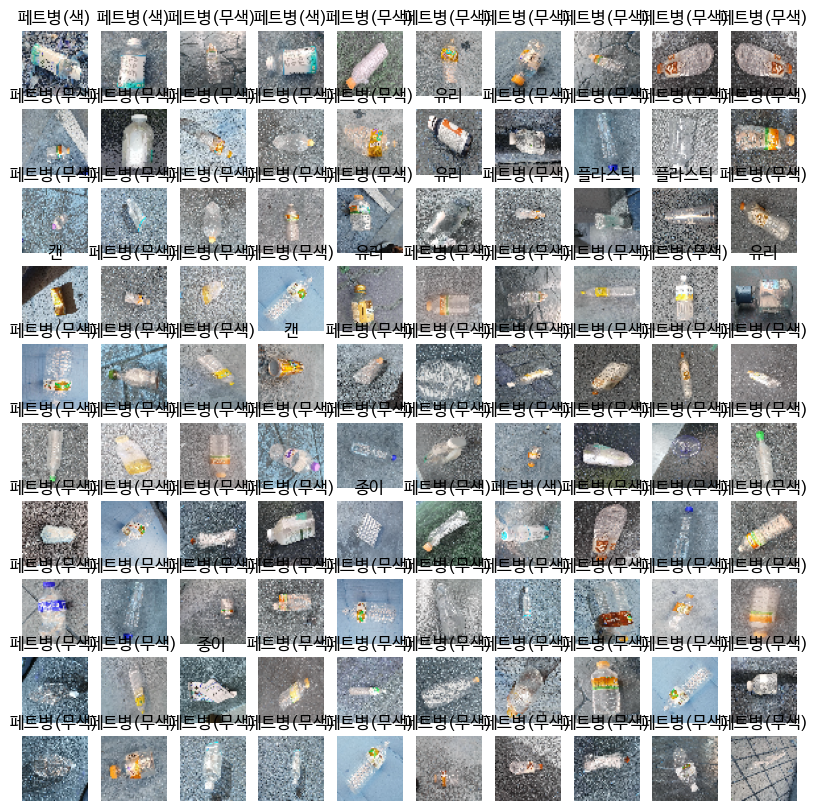

In [19]:
preds = model.predict(test_input[:])
index = [i for i in range(len(test_target)) if np.argmax(preds[i]) == 1 ]
print(index)

Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.figure(figsize=(10, 10))
plt.rc('font', family='NanumBarunGothic')
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(test_input[index[i]], cmap = 'gray_r')
  plt.title(Class[test_target[index[i]]])
  plt.axis("off")
plt.show()

--2023-06-06 02:45:30--  https://github.com/ausungju/human_learning/raw/main/test_img.npy
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ausungju/human_learning/main/test_img.npy [following]
--2023-06-06 02:45:30--  https://raw.githubusercontent.com/ausungju/human_learning/main/test_img.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75128 (73K) [application/octet-stream]
Saving to: ‘test_imgs.npy’

test_imgs.npy       100%[===================>]  73.37K  --.-KB/s    in 0.002s  

2023-06-06 02:45:30 (40.7 MB/s) - ‘test_imgs.npy’ saved [75128/75128]



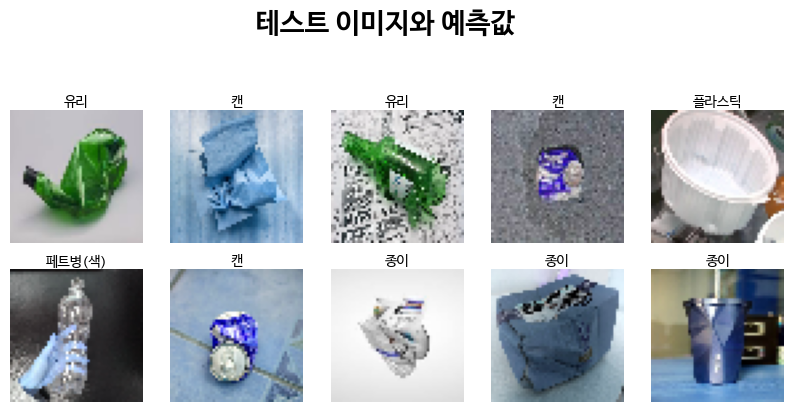

원래 정답 : 페트병 (색), 종이, 유리, 캔, 플라스틱, 페트병 (무색), 캔, 종이, 종이, 플라스틱 


In [20]:
!wget "https://github.com/ausungju/human_learning/raw/main/test_img.npy" -O test_imgs.npy
test_imgs = np.load("test_imgs.npy").reshape(-1,50,50,3)

Class = ['페트병(색)', '페트병(무색)','플라스틱', '캔', '종이', '유리']
plt.figure(figsize=(10, 10))
plt.rc('font', family='NanumBarunGothic')
for i in range( len(test_imgs)):
    temp = test_imgs[i].reshape(1,50,50,3)
    b = model.predict(temp, verbose   = 0)
    c = np.argmax(b)

    ax = plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(wspace=0.2)
    plt.axis("off")

    plt.imshow(temp[0], cmap = 'gray_r')
    plt.title(Class[c],fontsize=10,pad = 1)

plt.suptitle("테스트 이미지와 예측값",fontweight ="bold",fontsize='20') 
plt.show()
print("원래 정답 : 페트병 (색), 종이, 유리, 캔, 플라스틱, 페트병 (무색), 캔, 종이, 종이, 플라스틱 ")